# Midterm report - Hotel price exloratory data analysis (EDA)

- This notebook will present the results from analyzing more than 1000 hotels from the website Booking.com
- Target variable: Price (int)
- Feature variables:
    - Name: string
    - Address: string
    - Size: int
    - Distance to beach: float
    - Distance to airport: float
    - Pool: boolean
    - Car: boolean
    - Non-smoking room: boolean
    - Near beach: boolean
    - WiFi: boolean
    - Family room: boolean
    - Bar: boolean
    - Breakfast: boolean

# Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

# Load data

In [3]:
data = pd.read_csv("./raw data/hotel_raw.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1011 non-null   object 
 1   Address              1011 non-null   object 
 2   Price                1011 non-null   object 
 3   Size                 1011 non-null   int64  
 4   Distance to beach    1011 non-null   float64
 5   Distance to airport  1011 non-null   float64
 6   Pool                 1011 non-null   int64  
 7   Car                  1011 non-null   int64  
 8   Non-smoking room     1011 non-null   int64  
 9   Near beach           1011 non-null   int64  
 10  WiFi                 1011 non-null   int64  
 11  Family room          1011 non-null   int64  
 12  Bar                  1011 non-null   int64  
 13  Breakfast            1011 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 110.7+ KB


,Name,Address,Price,Size,Distance to beach,Distance to airport,Pool,Car,Non-smoking room,Near beach,WiFi,Family room,Bar,Breakfast
0,Lupin Center Da Nang Hotel,"171 Đường 3 Tháng 2, Phường Thuận Phước, Quận ...",VND 440.000,26,2.10,3.2,0,1,1,0,1,0,0,0
1,Beach Hotel by RAON - STAY 24H,"03 An Thuong 32, Ngu Hanh Son, Đà Nẵng, Việt Nam",VND 333.200,22,0.25,4.3,0,1,0,1,0,1,0,0
2,Royal Family Hotel,"39 Vo Van Kiet, Đà Nẵng, Việt Nam",VND 400.000,26,0.15,4.6,1,1,1,1,1,1,1,1
3,Palmier Hotel - Art House Da Nang,"305 Tran Hung Dao, An Hai Bac, Son Tra, Đà Nẵn...",VND 256.372,19,1.80,3.4,0,1,1,0,1,1,0,0
4,Yen Vy Hotel and Apartment,"24 An Thượng 30, Đà Nẵng, Việt Nam",VND 425.000,25,0.25,4.3,0,1,1,0,1,1,0,0


# Data cleaning

- Remove "VND" from Price column, convert it to int and scale down by 1000 for later analysis

In [4]:
def convert(data):
    return int(data.split()[1].replace(".",""))

def scale(data):
    return round(data/1000)

In [5]:
data["Price"] = data["Price"].apply(lambda x: scale(convert(x)))
data.head()

,Name,Address,Price,Size,Distance to beach,Distance to airport,Pool,Car,Non-smoking room,Near beach,WiFi,Family room,Bar,Breakfast
0,Lupin Center Da Nang Hotel,"171 Đường 3 Tháng 2, Phường Thuận Phước, Quận ...",440,26,2.10,3.2,0,1,1,0,1,0,0,0
1,Beach Hotel by RAON - STAY 24H,"03 An Thuong 32, Ngu Hanh Son, Đà Nẵng, Việt Nam",333,22,0.25,4.3,0,1,0,1,0,1,0,0
2,Royal Family Hotel,"39 Vo Van Kiet, Đà Nẵng, Việt Nam",400,26,0.15,4.6,1,1,1,1,1,1,1,1
3,Palmier Hotel - Art House Da Nang,"305 Tran Hung Dao, An Hai Bac, Son Tra, Đà Nẵn...",256,19,1.80,3.4,0,1,1,0,1,1,0,0
4,Yen Vy Hotel and Apartment,"24 An Thượng 30, Đà Nẵng, Việt Nam",425,25,0.25,4.3,0,1,1,0,1,1,0,0


In [6]:
data.describe()

,Price,Size,Distance to beach,Distance to airport,Pool,Car,Non-smoking room,Near beach,WiFi,Family room,Bar,Breakfast
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,1584.800198,65.177052,0.841350,4.167547,0.492582,0.538081,0.804154,0.386746,0.906034,0.787339,0.376855,0.019782
std,2606.333161,116.534248,1.015069,1.642121,0.500192,0.498794,0.397047,0.487246,0.291926,0.409392,0.484838,0.139321
min,177.000000,12.000000,0.007000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,484.000000,22.000000,0.150000,3.600000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,744.000000,28.000000,0.350000,4.400000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1379.000000,50.000000,1.350000,4.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,25347.000000,1000.000000,8.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- In 3 columns Price, Size, Distance to beach, the medians are much smaller than the means => The distributions of these features are left-skewed
- Maximum value of Price, Size and Distance to beach are much larger than its q3 value => These 3 variables contain a lot of outliers in its right tails
- For Distance to airport, its minimum is much smaller than its q1 value => Its distribution contains many outliers in both tails

# Univariate plotting

In [7]:
sns.set_style("dark")

## 1. Data distribution of Price

<Axes: ylabel='Price'>

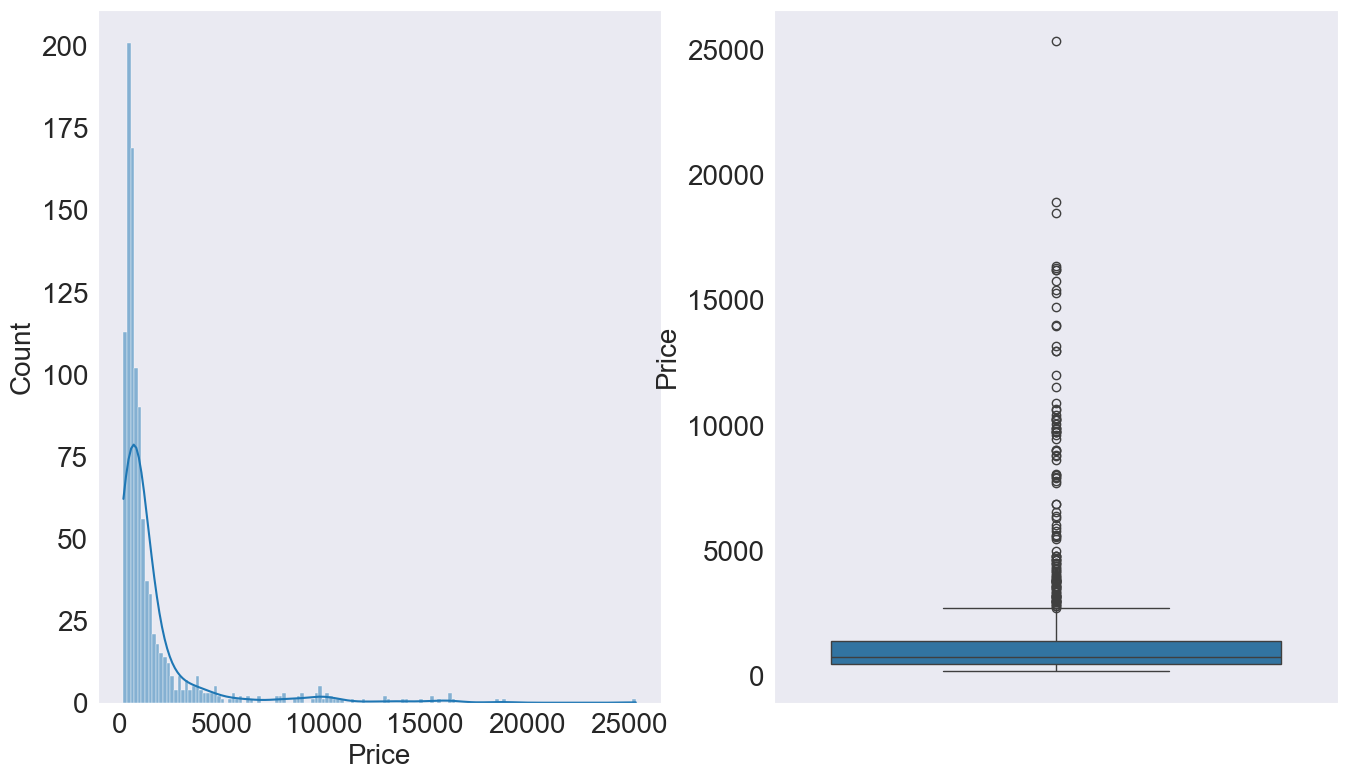

In [8]:
fig = plt.figure(figsize = (16, 9))
plt.rcParams.update({'font.size': 20})
gs = gridspec.GridSpec(1, 2)

prices = fig.add_subplot(gs[0, 0])
sns.histplot(data=data["Price"], ax = prices, kde = True)

prices = fig.add_subplot(gs[0, 1])
sns.boxplot(data=data["Price"], ax = prices)

- The majority of room prices fall in the range of 250,000 VND - 1,250,000 VND
- However, there are still many outliers, perhaps due to the existence of luxury hotels with high-end room classes

## 2. Data distribution of other features

 - Here, we will plot the distribution of the features Size, Distance to beach, and Distance to airport to verify the observations mentioned above

<Axes: xlabel='Size', ylabel='Count'>

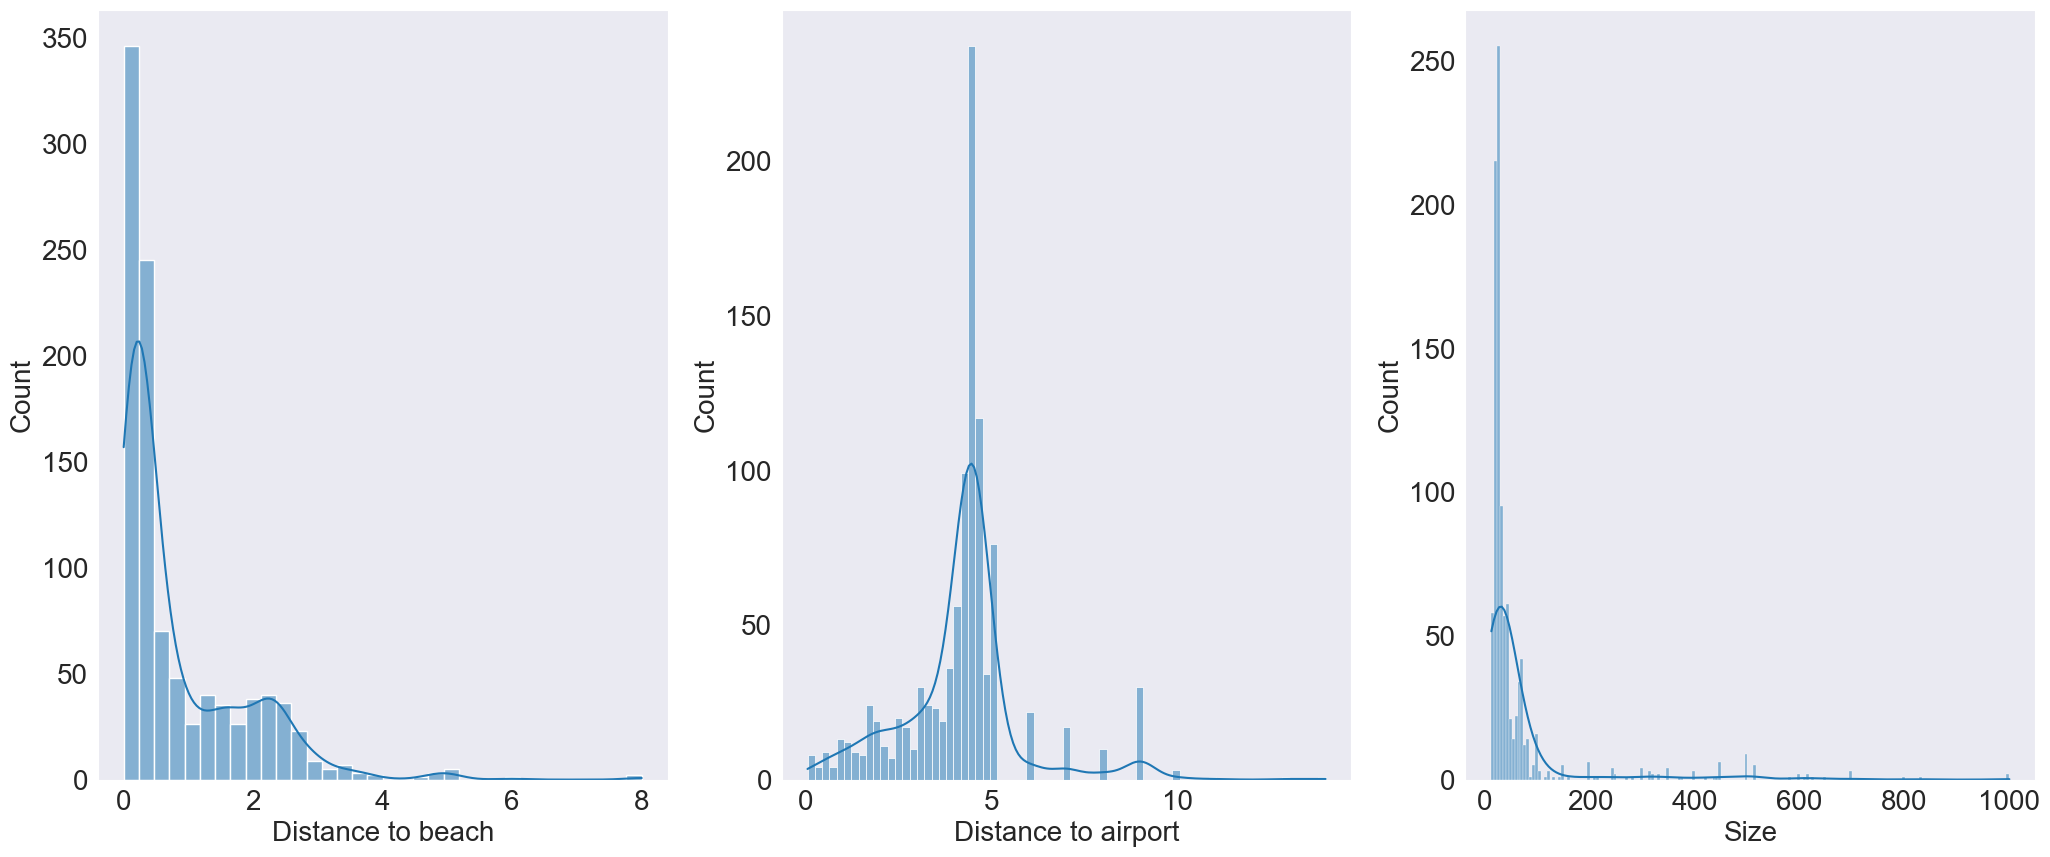

In [9]:
fig = plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 3)
plt.rcParams.update({'font.size': 20})


distance_beach = fig.add_subplot(gs[0, 0])
sns.histplot(data=data["Distance to beach"], ax = distance_beach, kde = True)

distance_airport = fig.add_subplot(gs[0, 1])
sns.histplot(data=data["Distance to airport"], ax = distance_airport, kde = True)

sizes = fig.add_subplot(gs[0, 2])
sns.histplot(data=data["Size"], ax = sizes, kde = True)

- It can be seen that the majority of hotels are built near the beach rather than the airport

## 

<Axes: xlabel='Bar', ylabel='Price'>

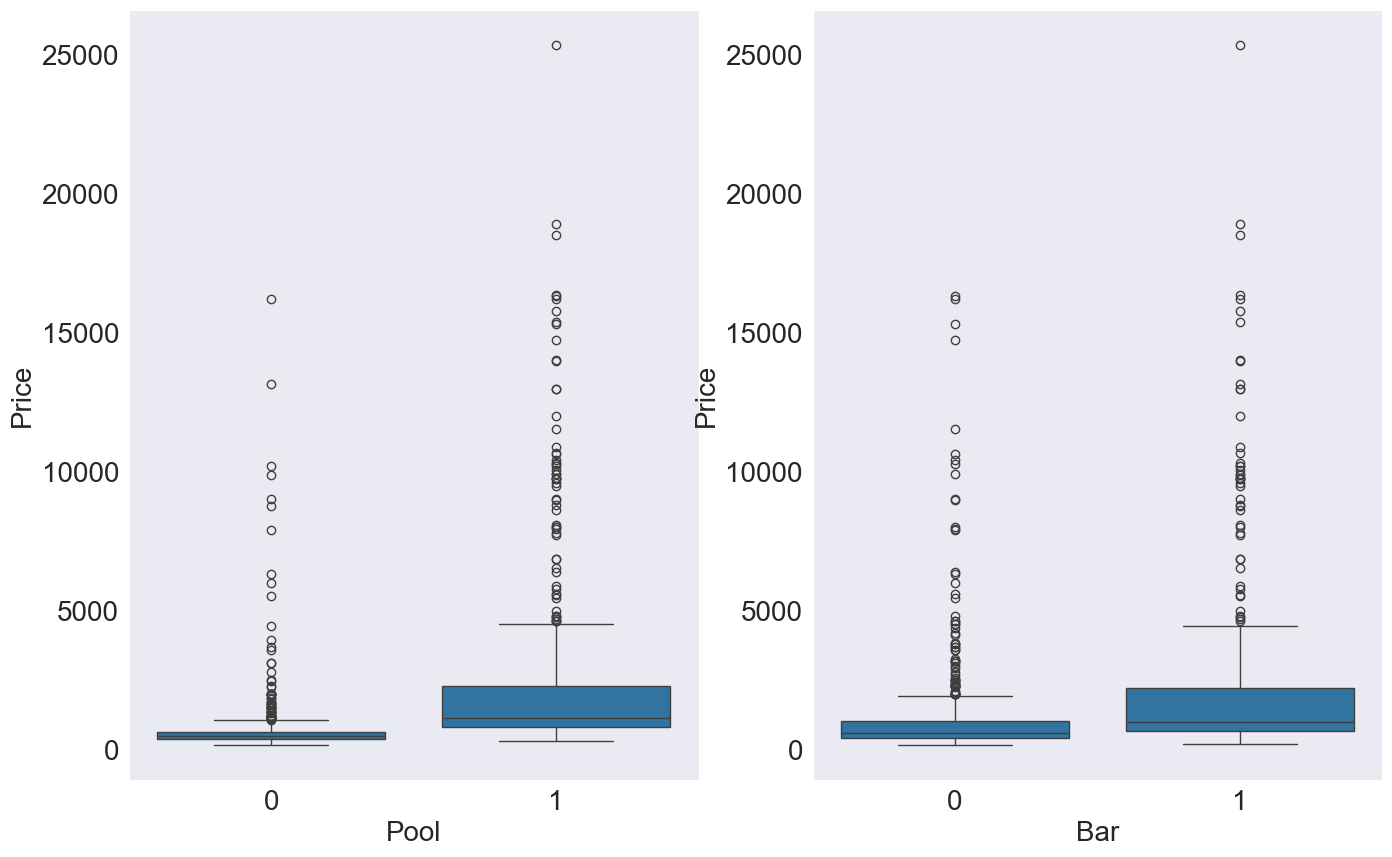

In [10]:
fig = plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 3)

sns.boxplot(data=data, x ="Pool", y = "Price", ax = fig.add_subplot(gs[0,0]))
sns.boxplot(data=data, x ="Bar", y = "Price", ax = fig.add_subplot(gs[0,1]))

- It seems like hotels with pools and bars tend to have more expensive rooms.


## 3. Remove outliers

- Assign the values not in range [q1 - 2.5*iqr; q3 + 2.5*iqr] to its nearest boundaries (Capping)


In [11]:
def change_outlier(column):
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    lower_bridge = q1 - (iqr * 2.5)
    upper_bridge = q3 + (iqr * 2.5)
    for i in range(len(data[column])):
        if data[column].iloc[i] <= lower_bridge:
            data[column].iloc[i] = lower_bridge
        elif data[column].iloc[i] >= upper_bridge:
            data[column].iloc[i] = upper_bridge

- Perform capping on 4 variables

In [12]:
cols = ["Price","Size", "Distance to beach", "Distance to airport"]

for col in cols:
    change_outlier(col)
data.describe()

,Price,Size,Distance to beach,Distance to airport,Pool,Car,Non-smoking room,Near beach,WiFi,Family room,Bar,Breakfast
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,1149.540059,41.975272,0.827502,4.096934,0.492582,0.538081,0.804154,0.386746,0.906034,0.787339,0.376855,0.019782
std,1002.728317,30.205212,0.949144,1.337243,0.500192,0.498794,0.397047,0.487246,0.291926,0.409392,0.484838,0.139321
min,177.000000,12.000000,0.007000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,484.000000,22.000000,0.150000,3.600000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,744.000000,28.000000,0.350000,4.400000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1379.000000,50.000000,1.350000,4.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,3616.500000,120.000000,4.350000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Price distribution after capping

<Axes: ylabel='Price'>

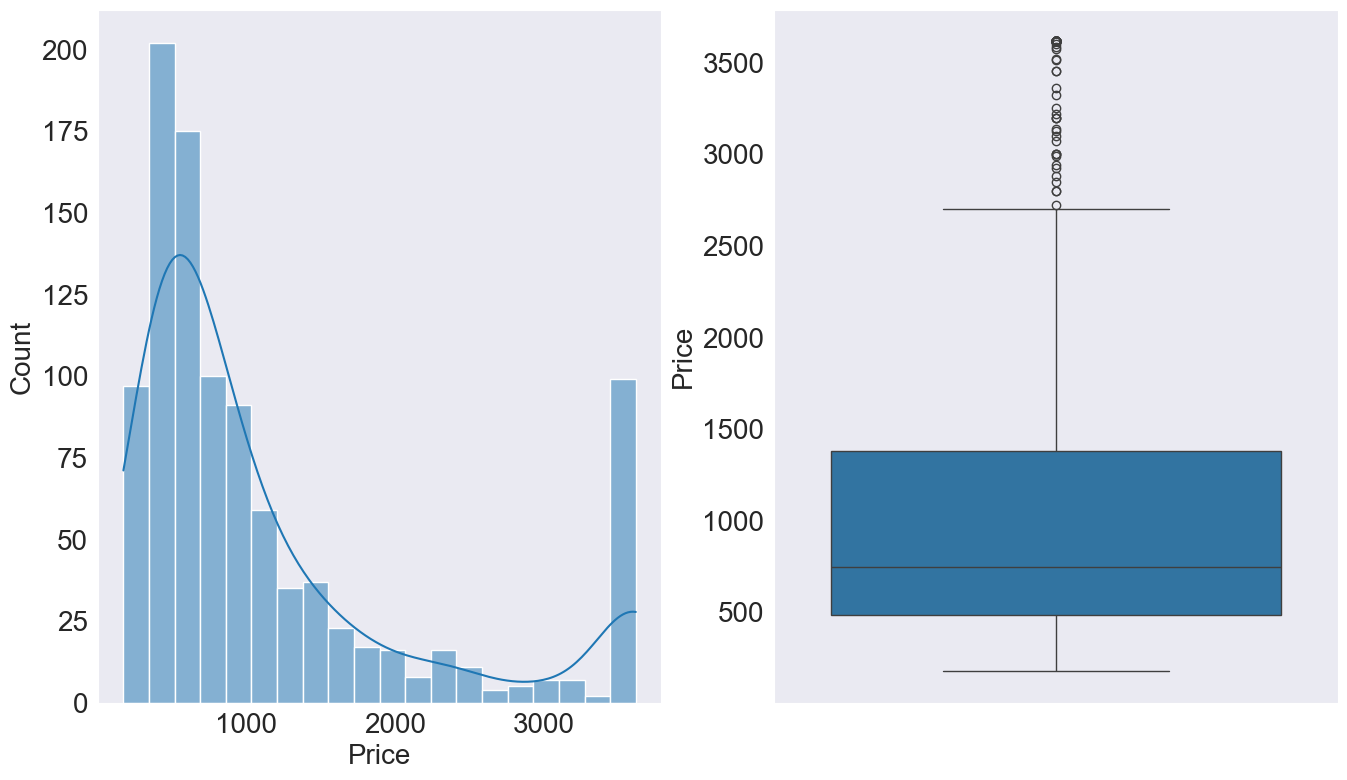

In [13]:
fig = plt.figure(figsize = (16, 9))
gs = gridspec.GridSpec(1, 2)

prices = fig.add_subplot(gs[0, 0])
sns.histplot(data=data["Price"], ax = prices, kde = True)

prices = fig.add_subplot(gs[0, 1])
sns.boxplot(data=data["Price"], ax = prices)

It can be seen that the number of outliers has decreased significantly after being capped

## Other features distribution after capping

<Axes: xlabel='Size', ylabel='Count'>

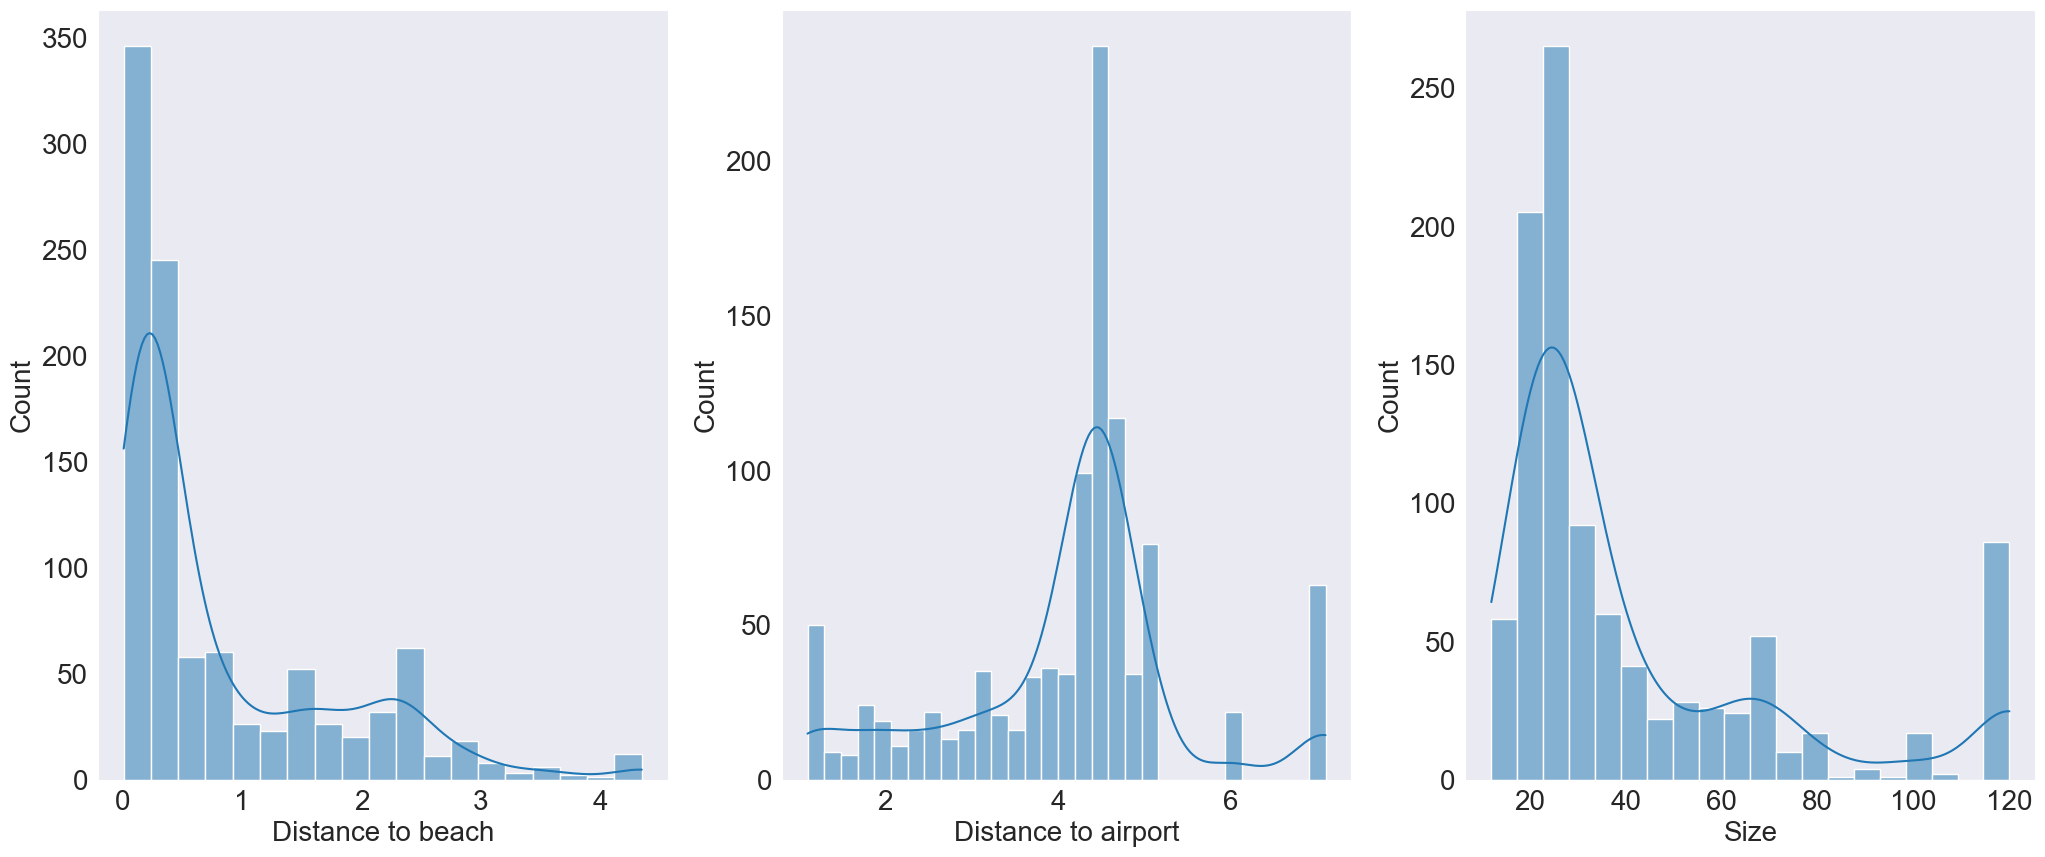

In [14]:
fig = plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 3)


distance_beach = fig.add_subplot(gs[0, 0])
sns.histplot(data=data["Distance to beach"], ax = distance_beach, kde = True)

distance_airport = fig.add_subplot(gs[0, 1])
sns.histplot(data=data["Distance to airport"], ax = distance_airport, kde = True)

sizes = fig.add_subplot(gs[0, 2])
sns.histplot(data=data["Size"], ax = sizes, kde = True)


Outliers have been removed, making visualization easier. 

<Axes: xlabel='Bar', ylabel='Price'>

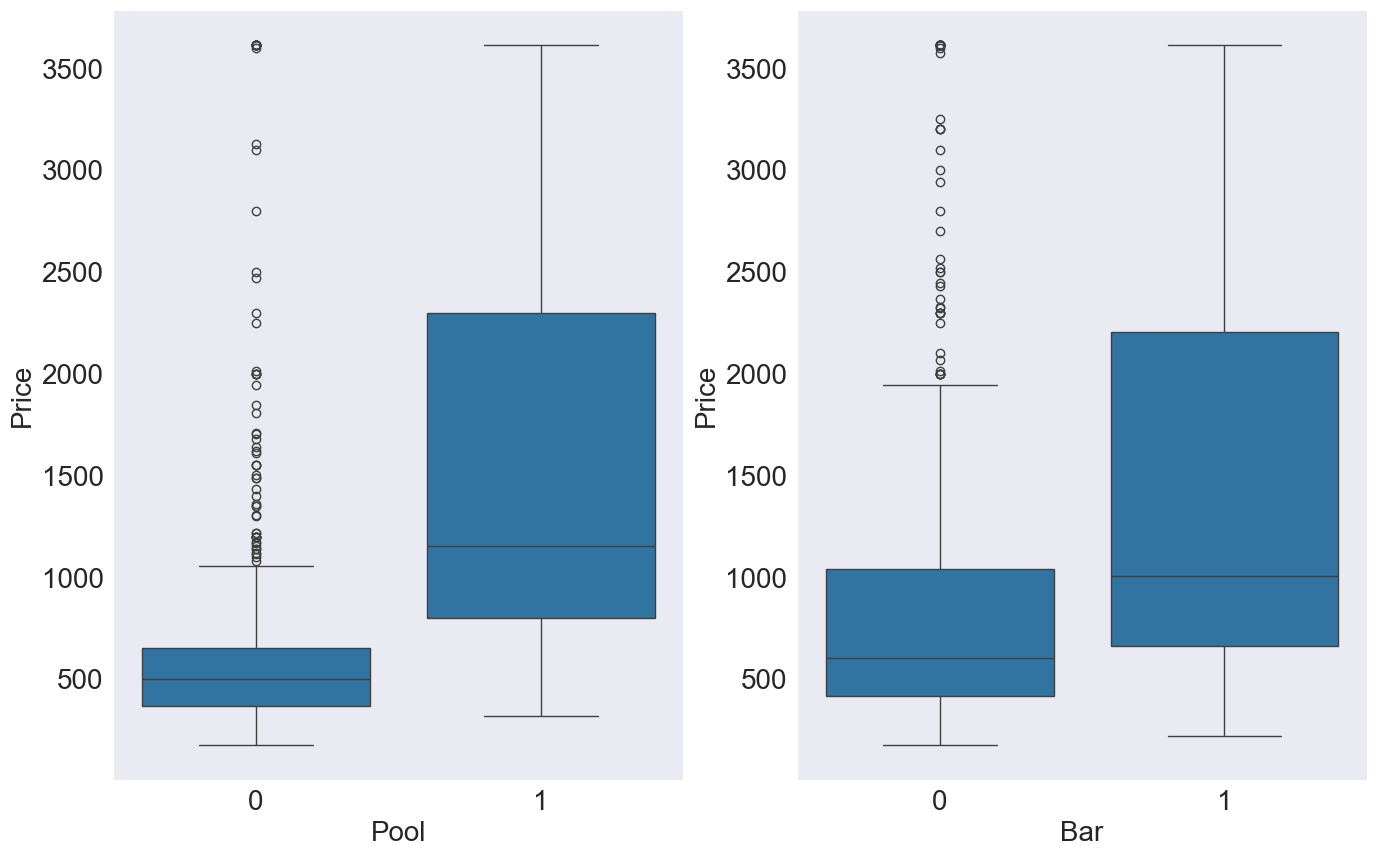

In [15]:
fig = plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 3)

sns.boxplot(data=data, x ="Pool", y = "Price", ax = fig.add_subplot(gs[0,0]))
sns.boxplot(data=data, x ="Bar", y = "Price", ax = fig.add_subplot(gs[0,1]))

Outliers have been removed, making visualization easier.
Hotels with pools and hotels with bars have an average price significantly higher than hotels without these two services.

# Multivariate Plotting

## Correlation map

In [16]:
print(data.dtypes)

Name                    object
Address                 object
Price                  float64
Size                     int64
Distance to beach      float64
Distance to airport    float64
Pool                     int64
Car                      int64
Non-smoking room         int64
Near beach               int64
WiFi                     int64
Family room              int64
Bar                      int64
Breakfast                int64
dtype: object


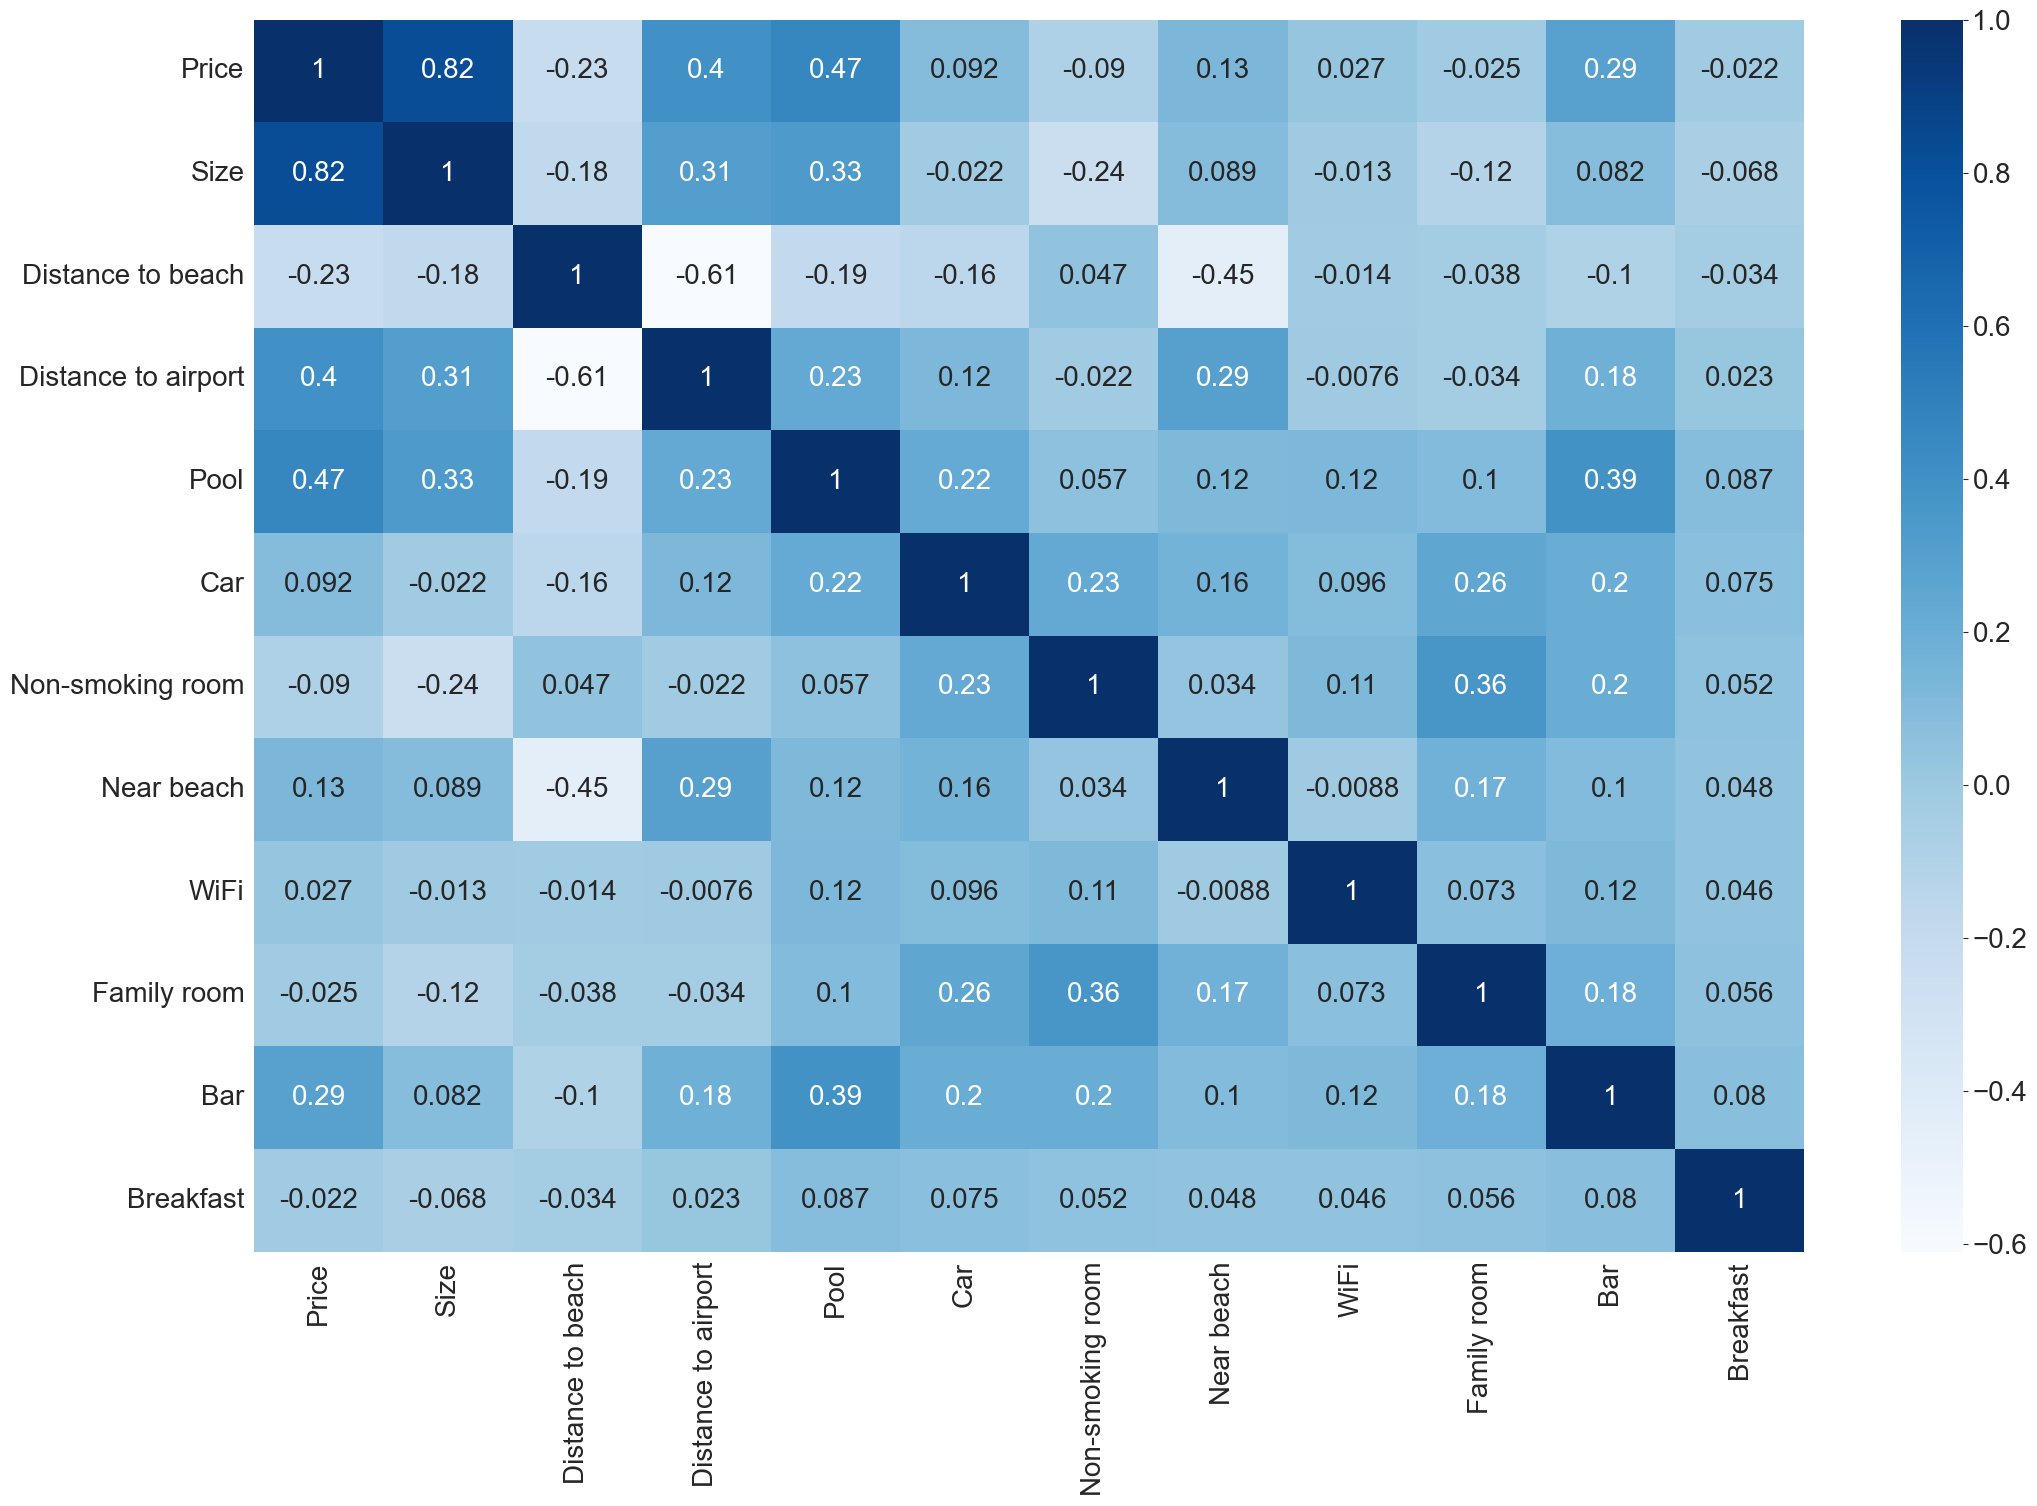

In [17]:
plt.figure(figsize = (25, 16))

numeric_data = data.select_dtypes(include=[np.number])
dataplot = sns.heatmap(numeric_data.corr(), annot = True, cmap= "Blues")

- It can be seen that:
    - Size has a strong positive correlation with Price (0.82)
    - In addition, some other features like: Distance to beach, Distance to airport, Pool, Bar also have impact on Price


<Axes: xlabel='Distance to airport', ylabel='Price'>

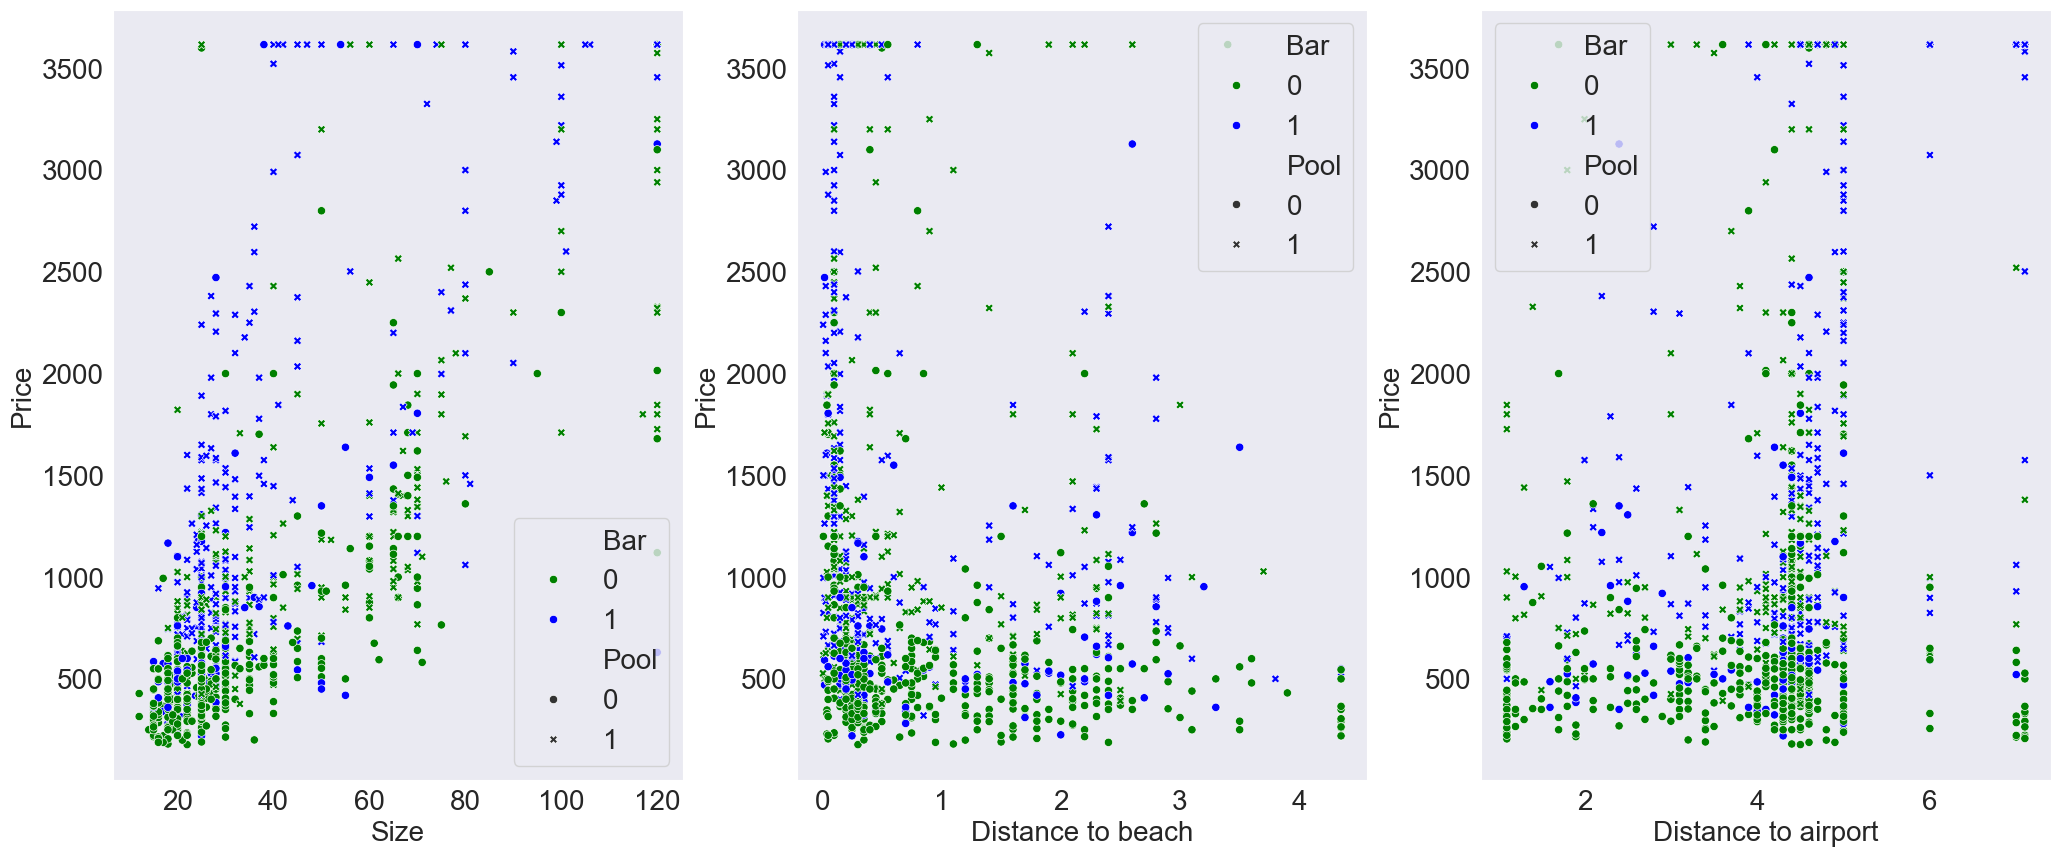

In [18]:
fig = plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 3)


pool = fig.add_subplot(gs[0, 0])
sns.scatterplot(data = data, x = "Size", y = "Price", hue = "Bar", style = "Pool", palette=["g", "b"], ax = pool)


bar = fig.add_subplot(gs[0, 1])
sns.scatterplot(data = data, x = "Distance to beach", y = "Price", hue = "Bar", style = "Pool", palette=["g", "b"], ax = bar)

bar = fig.add_subplot(gs[0, 2])
sns.scatterplot(data = data, x = "Distance to airport", y = "Price", hue = "Bar",style = "Pool", palette=["g", "b"], ax = bar)

- Most of hotels that offer expensive rooms (more than 1.500.000 VND) also have bar and pool
- On the contrary, cheap hotels (<1.000.000 VND) are more likely to not have bar or pool or both
- There is a clearer correlation between size and price than between distance to beach/airport and price.

<Axes: xlabel='Size', ylabel='Price'>

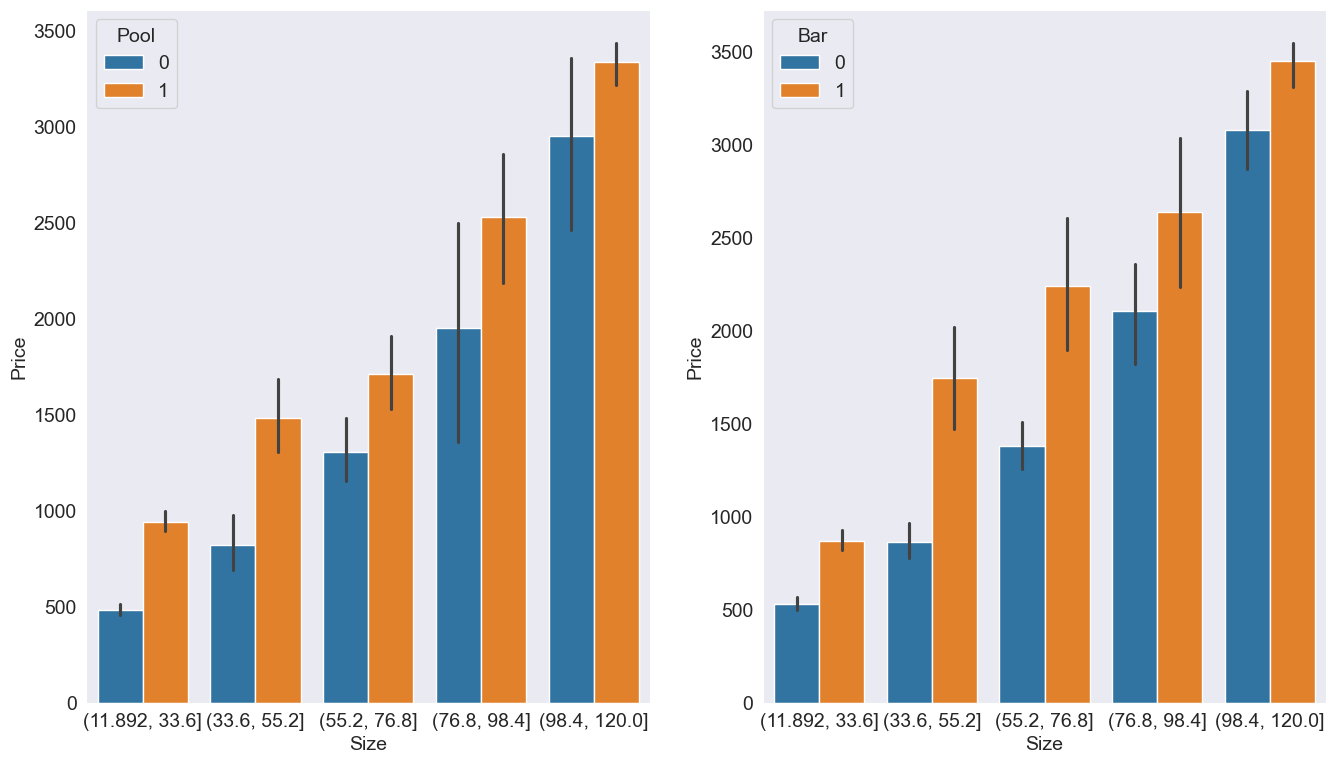

In [19]:
temp = data.copy()
temp["Size"] = pd.cut(temp["Size"], bins=5)
temp["Pool"] = temp["Pool"].astype(str)  # Convert 'Pool' column to string type
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize = (16, 9))
gs = gridspec.GridSpec(1, 2)

bars = fig.add_subplot(gs[0, 0])
sns.barplot(data=temp, x=temp["Size"], y="Price", hue = "Pool", ax = bars)

pools = fig.add_subplot(gs[0, 1])
sns.barplot(data=temp, x=temp["Size"], y="Price", hue = "Bar", ax = pools)

- It is clearly observed from the graph that within the same interval of room size, hotels have bar/pool are much more expensive

## 3D Distribution

### 

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'},{'type': 'scatter3d'},{'type': 'scatter3d'}]]
)

fig.add_trace(
    go.Scatter3d(
        x=data["Distance to beach"], 
        y=data["Size"],
        z=data["Price"], 
        mode='markers',
        marker=dict(
            size=7,
            color=data["Pool"],  
            colorscale='Viridis',  
            opacity=0.5
        )
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter3d(
        x=data["Distance to beach"], 
        y=data["Size"],
        z=data["Price"], 
        mode='markers',
        marker=dict(
            size=7,
            color=data["Bar"],  
            colorscale='Viridis',
            opacity=0.5
        )
    ),
    row=1, col=3
)

fig.show()

- Pools are more common than bars, this may lead to a higher correlation between pool to price than bar to price.
- Most of expensive hotels offer pools.


In [21]:
fig = px.scatter_3d(data,x="Distance to beach", y="Distance to airport",z = "Size", color = data["Price"], opacity=0.5)
fig.show()

- The majority of expensive hotels are near the beach
- It can be clearly seen from the graph that the price is more clearly differentiated by size than by the distance to the beach/airport.

## Using t-SNE to reduce the dimension of the graph

In [22]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data[["Distance to beach","Size", "Distance to airport",  "Pool", "Bar"]])

In [23]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=data["Price"])
fig.show()

- There are 2 clear clusters represent 2 different groups of hotels: cheap and luxury.
- The clusters in the middle of the graph might represent the middle class of hotels, while the S-like clusters represent a higher group of hotels
- The high variance of these 2 clusters might be because of the variation in location and facilities of these hotels.

# Map of hotels in Danang
# ![title](utils/map.png)

# Conclusion

- The majority of hotel prices in Danang fall in the range 250.000 - 1.000.000 VND
- Most of hotels in Danang are built closer to the beach rather than the airport
- Luxuries hotels are more likely to be located near the coastline than in the city centre
- Size of rooms has the largest impact on the price among the selected features
- Pool and bar are the top 2 facilities that should be available in high-end hotels

# Min max scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

data_model = numeric_data
scaler = MinMaxScaler()
data_model = pd.DataFrame(scaler.fit_transform(data_model), index=numeric_data.index , columns=data_model.columns)

# Using Model

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.decomposition import PCA

In [35]:
models = {
        "Linear": LinearRegression(),
        "RandomForest":RandomForestRegressor(),
         }
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_val, y_train, y_val):    
    
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    names = []
    scores = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        scores.append(metrics.explained_variance_score(y_val, y_pred))
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(sqrt(mean_squared_error(y_val,y_pred)))
    evalutes = {'Algorithms': names, 'Variance': scores, 'MAE': maes, 'RMSE': rmse}
    model_scores = pd.DataFrame(evalutes)
    # model_scores = model_scores.sort_values('MAE',ascending=False)
    return model_scores

# Compare between PCA and Non-PCA

In [58]:
## PCA
my_PCA = PCA(n_components=3)
X_input_PCA = my_PCA.fit(data_model.drop(['Price'], axis=1)).transform(data_model.drop(['Price'], axis=1))
Y_target_PCA = data_model['Price']
# ### Non-PCA
X_input_nonPCA = data_model.drop(['Price'], axis=1)
Y_target_nonPCA = data_model['Price']

In [59]:
print("Dữ liệu gốc: ", X_input_nonPCA.shape)

print("Dữ liệu sau PCA:" , X_input_PCA.shape)

Dữ liệu gốc:  (1011, 11)
Dữ liệu sau PCA: (1011, 3)


In [60]:
## Phan chia du lieu

#PCA
X_PCA_train, X_PCA_test,Y_PCA_train, Y_PCA_test = train_test_split(X_input_PCA, Y_target_PCA, test_size=0.2, random_state=0)
#Non-PCA
X_nonPCA_train, X_nonPCA_test,Y_nonPCA_train, Y_nonPCA_test = train_test_split(X_input_nonPCA, Y_target_nonPCA, test_size=0.2, random_state=0)

In [61]:
#PCA
model_scores_PCA = models_score(models, X_PCA_train, X_PCA_test, Y_PCA_train, Y_PCA_test).set_index('Algorithms')
#NoPCA
model_scores_noPCA = models_score(models, X_nonPCA_train, X_nonPCA_test, Y_nonPCA_train, Y_nonPCA_test).set_index('Algorithms')
print('PCA')
print(model_scores_PCA)
print('--------------------------------------------')
print('No PCA')
print(model_scores_noPCA)

PCA
              Variance       MAE      RMSE
Algorithms                                
Linear        0.390330  0.159321  0.219818
RandomForest  0.659012  0.107923  0.164309
--------------------------------------------
No PCA
              Variance       MAE      RMSE
Algorithms                                
Linear        0.761687  0.098460  0.137734
RandomForest  0.787966  0.082667  0.130756


Text(0.5, 1.0, 'Compare score using PCA and NoPCA by Algorithms')

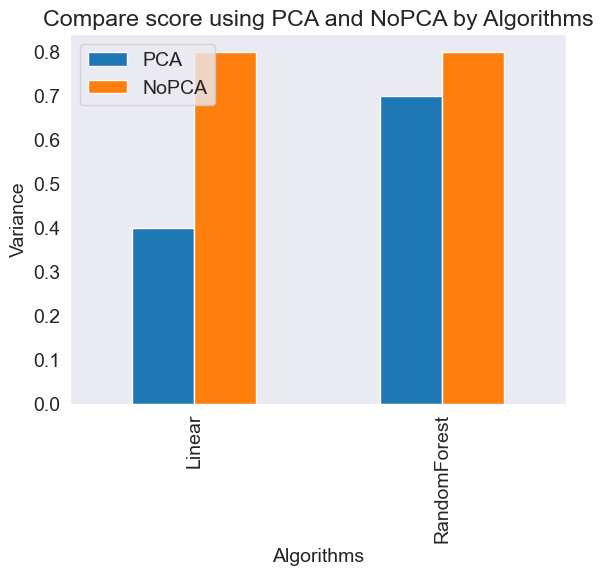

In [63]:
df_comparea_pca = pd.DataFrame({
    'Algorithms': list(model_scores_PCA.index),
    'PCA': [round(model_scores_PCA['Variance'][0],1), round(model_scores_PCA['Variance'][1],1)],
    'NoPCA': [round(model_scores_noPCA['Variance'][0],1), round(model_scores_noPCA['Variance'][1],1)],
})
  
# plotting graph
fig = df_comparea_pca.plot(x="Algorithms", y=["PCA", "NoPCA"], kind="bar")
fig.set_ylabel('Variance')
fig.set_xlabel('Algorithms')
fig.set_title('Compare score using PCA and NoPCA by Algorithms')
# plot MAE and RMSE


In [67]:
# Drop Price, Name, Address column
X_data = data_model.drop(["Price"], axis=1)
y_target = data_model['Price']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target, test_size=0.3, random_state=0)

In [68]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)
score_variance = r2_score(y_test, y_pred_model)*100
print('RandomForest R^2 Score: {:.03f}'.format(score_variance))

RandomForest R^2 Score: 79.621


In [69]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)
score_variance = metrics.explained_variance_score(y_test, y_pred_model)*100
print('Evaluate prediction based on variance : ', score_variance)

Evaluate prediction based on variance :  80.36622182964778


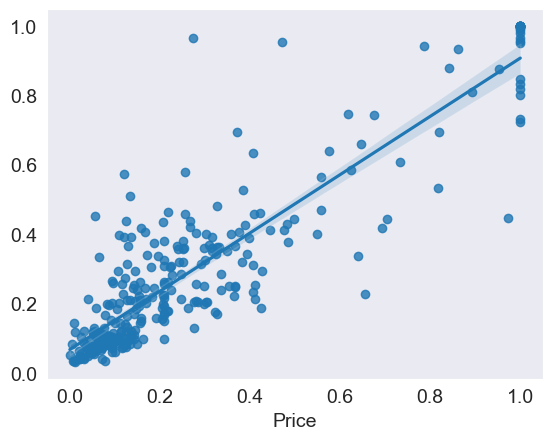

In [71]:
fig = sns.regplot(x=y_test,y=y_pred_model)
plt.plot([0,0],[1,1],color='red')

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)
y_pred_grid = grid.predict(X_test)
print("Best score: " + str(grid.best_score_))
score_grid = metrics.explained_variance_score(y_test, y_pred_grid)*100

print("Score by before gridsearch:" + str(score_variance))
print("Score by after gridsearch:" + str(score_grid))
print('Cải thiện được: '+ str(score_grid-score_variance))

Best score: 0.7520427865466159
Score by before gridsearch:80.36622182964778
Score by after gridsearch:81.82137146506804
Cải thiện được: 1.4551496354202555


In [76]:
# Tu chon thuoc tinh 
data_choice_features = data[['Price','Size','Distance to beach','Distance to airport','Pool', 'Bar']]
X_data_choice = data_choice_features.drop(['Price'],axis=1)
y_target_choice = data_choice_features['Price']

### Chia du lieu va du doan mo hinh randomforest 
X_choice_train,X_choice_test,y_choice_train,y_choice_test=train_test_split(X_data_choice,y_target_choice,test_size=0.2, random_state=0)
model_choice = RandomForestRegressor()
model_choice.fit(X_train,y_train)
y_pred_choice = model_choice.predict(X_test)
score_choice = metrics.explained_variance_score(y_test, y_pred_choice)*100

print("Score by before Choice:" + str(score_choice))
print("Score by after Choice:" + str(score_variance))

print('Cải thiện được: '+ str(score_choice-score_variance))

Score by before Choice:80.5253443435738
Score by after Choice:80.36622182964778
Cải thiện được: 0.15912251392602172
